# Day 12: 70 Days Pre-Bootcamp Online Class with Data Science Nigeria - Machine Learning Stream #DSN70daysofML
Testing Assumptions <br>
*Note;*
* Making correlation 'false' rather than either positive or negative makes the best line of fit becomes flat.
* The correlation between the variance and R-squared value is that the higher the variance the lower the R-squared value.
* "random" library is used to generate random numbers.

In [1]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

style.use('fivethirtyeight')

In [2]:
#create dataset
def create_dataset(hm, variance, step=2, correlation=False): #hm = 'How many data points do you want to create'
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
    xs = [i for i in range(len(ys))]
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

In [3]:
def best_fit_slope_and_intercept(xs,ys):
    m = ( ((mean(xs) * mean(ys)) - mean(xs*ys)) / 
            ((mean(xs)**2) - mean(xs**2)) )
    b = mean(ys) - m*mean(xs)
    return m, b

In [4]:
xs,ys = create_dataset(40, 40, 2, correlation='pos')

In [5]:
m, b = best_fit_slope_and_intercept(xs,ys)
print(f'The best fit slope is {m}')
print(f'The intercept is {b}')
regression_line = [(m*x)+b for x in xs] #y =  mx + b

predict_x = 8
predict_y = (m*predict_x)+ b

The best fit slope is 2.3038461538461537
The intercept is -4.299999999999997


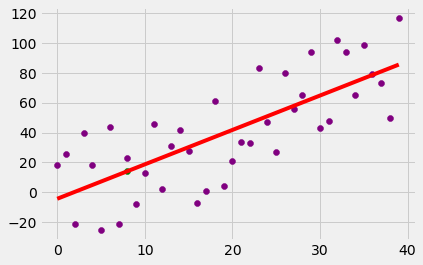

In [6]:
#plot
plt.scatter(xs,ys, color = 'purple')
plt.scatter(predict_x, predict_y, color = 'g')
plt.plot(xs, regression_line, color = 'red')
plt.show()

In [7]:
#function to calculate Squared error
def squared_error(ys_original,ys_line):
    return sum((ys_line-ys_original)**2)

def coefficient_of_determination(ys_original,ys_line):
    y_mean_line = [mean(ys_original) for ys in ys_original]
    squared_error_regr = squared_error(ys_original, ys_line)
    squared_error_y_mean = squared_error(ys_original, y_mean_line)
    return 1 - (squared_error_regr/ squared_error_y_mean)

In [8]:
r_squared = coefficient_of_determination(ys,regression_line)
print(r_squared)

0.556700908816204
